<a href="https://colab.research.google.com/github/1911521014SitiNina/Kel-4-APM/blob/main/Automobile_SimpleRegresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [67]:
#memanggil dataset
dataset = pd.read_excel('auto_mobile.xlsx',usecols=['engine_size','price'])

In [68]:
#menampilkan sebagian isi dataset
df = pd.DataFrame(dataset)
df.head()

,engine_size,price
0,130,13495.0
1,130,16500.0
2,152,16500.0
3,109,13950.0
4,136,17450.0


In [69]:
df.shape

(201, 2)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   engine_size  201 non-null    int64  
 1   price        201 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.3 KB


In [71]:
df.describe()

,engine_size,price
count,201.000000,201.000000
mean,126.875622,13207.129353
std,41.546834,7947.066342
min,61.000000,5118.000000
25%,98.000000,7775.000000
50%,120.000000,10295.000000
75%,141.000000,16500.000000
max,326.000000,45400.000000


In [72]:
value = df['engine_size'].quantile(0.98)
df = df.replace(np.inf, value)

In [73]:
# Mencari dan menangani missing values.
df.isnull().sum()

engine_size    0
price          0
dtype: int64

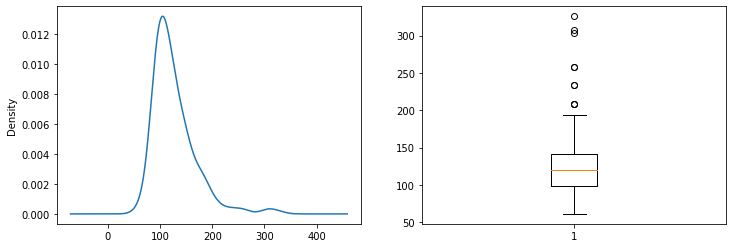

In [74]:
# Univerative analysis engine_size.
# Melihat distribusi dari engine_size.
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['engine_size'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['engine_size'])
plt.show()

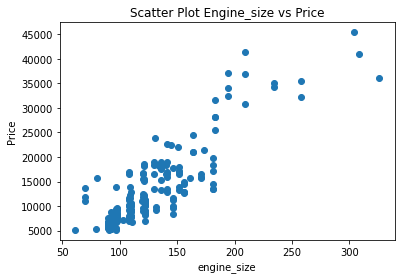

In [75]:
# Bivariate analysis horsepower dan price.
# Menggundang scatter plot.
plt.scatter(df['engine_size'], df['price'])
plt.xlabel('engine_size')
plt.ylabel('Price')
plt.title('Scatter Plot Engine_size vs Price')
plt.show()

In [76]:
# Mengetahui nilai korelasi dari engine_size dan price.
# Nilai korelasi adalah 0.87 termasuk kategori sangat tinggi.
df.corr()

,engine_size,price
engine_size,1.000000,0.872335
price,0.872335,1.000000


In [77]:
# Buat variable x dan y
x = df['engine_size'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [78]:
# kita split data kita menjadi training and testing dengan porsi 80:20.
x_train, x_test, y_train, y_test = train_test_split(x,y,
test_size=0.2)

In [79]:
lin_reg = LinearRegression()

In [80]:
df.isnull().any().any()  #This code tells you if you have some NaN value in you dataframe

False

In [81]:
df.isnull().any()

engine_size    False
price          False
dtype: bool

In [82]:
# Only select rows that have all finite entries.
x = x[np.all(np.isfinite(x), axis=1)]

In [83]:
value = df['engine_size'].quantile(0.98)
df = df.replace(np.inf, value)

In [84]:
value = df['price'].quantile(0.98)
df = df.replace(np.inf, value)

In [85]:
data = df.fillna(method='ffill')

In [86]:
# training model menggunakan training data yang sudah di split
lin_reg.fit(x_train, y_train)

LinearRegression()

In [87]:
# cari nilai koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[170.12635786]]
[-8297.56381833]


In [88]:
# Cari nilai accuracy score
lin_reg.score(x_test, y_test)

0.4090117030174045

Text(0.5, 1.0, 'Plot Engine_Size vs Price')

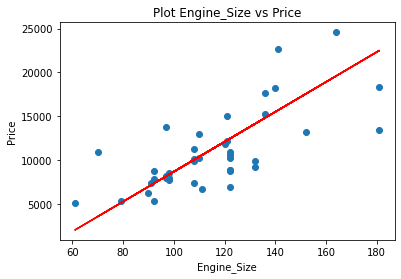

In [90]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Engine_Size')
plt.ylabel('Price')
plt.title('Plot Engine_Size vs Price')

In [91]:
# Prediksi harga moil dengan horsepower 100.
lin_reg.predict([[100]])

array([[8715.07196783]])

In [92]:
# Prediksi harga mobil dengan horsepower 150.
lin_reg.predict([[150]])

array([[17221.38986091]])

In [93]:
# Prediksi harga mobil dengan horsepower 200.
lin_reg.predict([[200]])

array([[25727.70775399]])